# High Resolution Population Density Maps

* **Products used:**
[High Resolution Population Density Maps + Demographic Estimates by CIESIN and Meta](https://registry.opendata.aws/dataforgood-fb-hrsl/)

*This dataset is external to the Digital Earth Africa platform.*

## Background

Africa is the second most populous continent in the world and has a rapidly growing population. Population growth and its spatial distribution are important factors to be considered for sustainable development. For example, spatially distributed population and demographic information can be used to support infrastructure planning and understand potential impact of environmental changes and disasters on lives.

[High Resolution Population Density Maps + Demographic Estimates by CIESIN and Meta](https://registry.opendata.aws/dataforgood-fb-hrsl/) provides population data at approximately 30 m spatial resolution, i.e. estimate of the number of people living within 30-by-30-meter grid cells. The dataset is created by Meta and the Center for International Earth Science Information Network (CIESIN) at Columbia University. It combines information from census and building identification from high resolution satellite imagery. 
In addition to overall population density, data are available in the following demographic categories:
* Male
* Female
* Women of reproductive age (ages 15-49)
* Children (ages 0-5)
* Youth (ages 15-24)
* Elderly (ages 60+)

More information on the method used can be found at https://dataforgood.facebook.com/dfg/docs/methodology-high-resolution-population-density-maps

## Description

This notebook will demonstrate how to load and visualize population data.

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages
Import Python packages that are used for the analysis.

In [1]:
import rioxarray as rxr
import matplotlib.pyplot as plt

from deafrica_tools.plotting import display_map

> The population data is hosted in AWS region `us-east-1`, therefor we set the AWS region to `us-east-1` when running this notebook. The AWS region needs to be changed to `af-south-1` to access DEAfrica data.

In [2]:
# set s3 region for HRSL data access
import os
os.environ['AWS_DEFAULT_REGION']="us-east-1"
os.environ['AWS_S3_ENDPOINT']="s3.us-east-1.amazonaws.com"

### Analysis parameters

This section defines the analysis parameters, including:

* `central_lat, central_lon, buffer`: center lat/lon and analysis window size for the area of interest

The default location is in Johannesburg, South Africa.

In [3]:
# Set the central latitude and longitude.
central_lat = -26.2041
central_lon = 28.0473

# Set the buffer to load around the central coordinates.
buffer = 0.05

# Compute the bounding box for the study area. 
xmin, xmax = central_lon - buffer, central_lon + buffer
ymin, ymax = central_lat - buffer, central_lat + buffer
bbox = (xmin, ymin, xmax, ymax)

## View the selected location

The next cell will display the selected area on an interactive map. Feel free to zoom in and out to get a better understanding of the area you'll be analysing. Clicking on any point of the map will reveal the latitude and longitude coordinates of that point.

In [4]:
display_map(x=(xmin, xmax), y=(ymin, ymax))

## Loading genenral population data

The gridded population data are provided in Cloud-Optimized Geotiffs (COGs) covering 10 by 10 degree tiles. 
We will access the latest version of the COGs through a virtual raster (VRT).

By setting the `chunks` parameter, data is lazy-loaded as a `dask array` first.

In [5]:
ds_general = rxr.open_rasterio('s3://dataforgood-fb-data/hrsl-cogs/hrsl_general/hrsl_general-latest.vrt', chunks ={'x': 1000, 'y': 1000})

In [6]:
# load the data within area of interest

pop_general = ds_general.isel(band=0).sel(x=slice(xmin, xmax), y = slice(ymax, ymin)).compute()

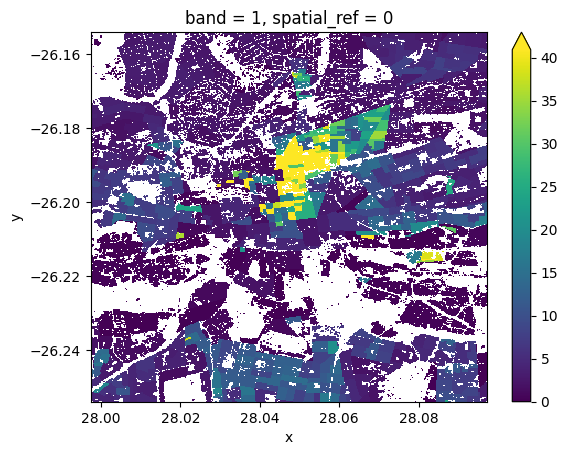

In [7]:
pop_general.plot.imshow(robust=True);

## Loading population data in different demographic categories

In the example below, we will load and visualize population for Youth (ages 15-24) and Women.

In [8]:
ds_youth = rxr.open_rasterio('s3://dataforgood-fb-data/hrsl-cogs/hrsl_youth_15_24/hrsl_youth_15_24-latest.vrt', chunks ={'x': 1000, 'y': 1000})
pop_youth = ds_youth.isel(band=0).sel(x=slice(xmin, xmax), y = slice(ymax, ymin)).compute()

In [9]:
ds_women = rxr.open_rasterio('s3://dataforgood-fb-data/hrsl-cogs/hrsl_women/hrsl_women-latest.vrt', chunks ={'x': 1000, 'y': 1000})
pop_women = ds_women.isel(band=0).sel(x=slice(xmin, xmax), y = slice(ymax, ymin)).compute()

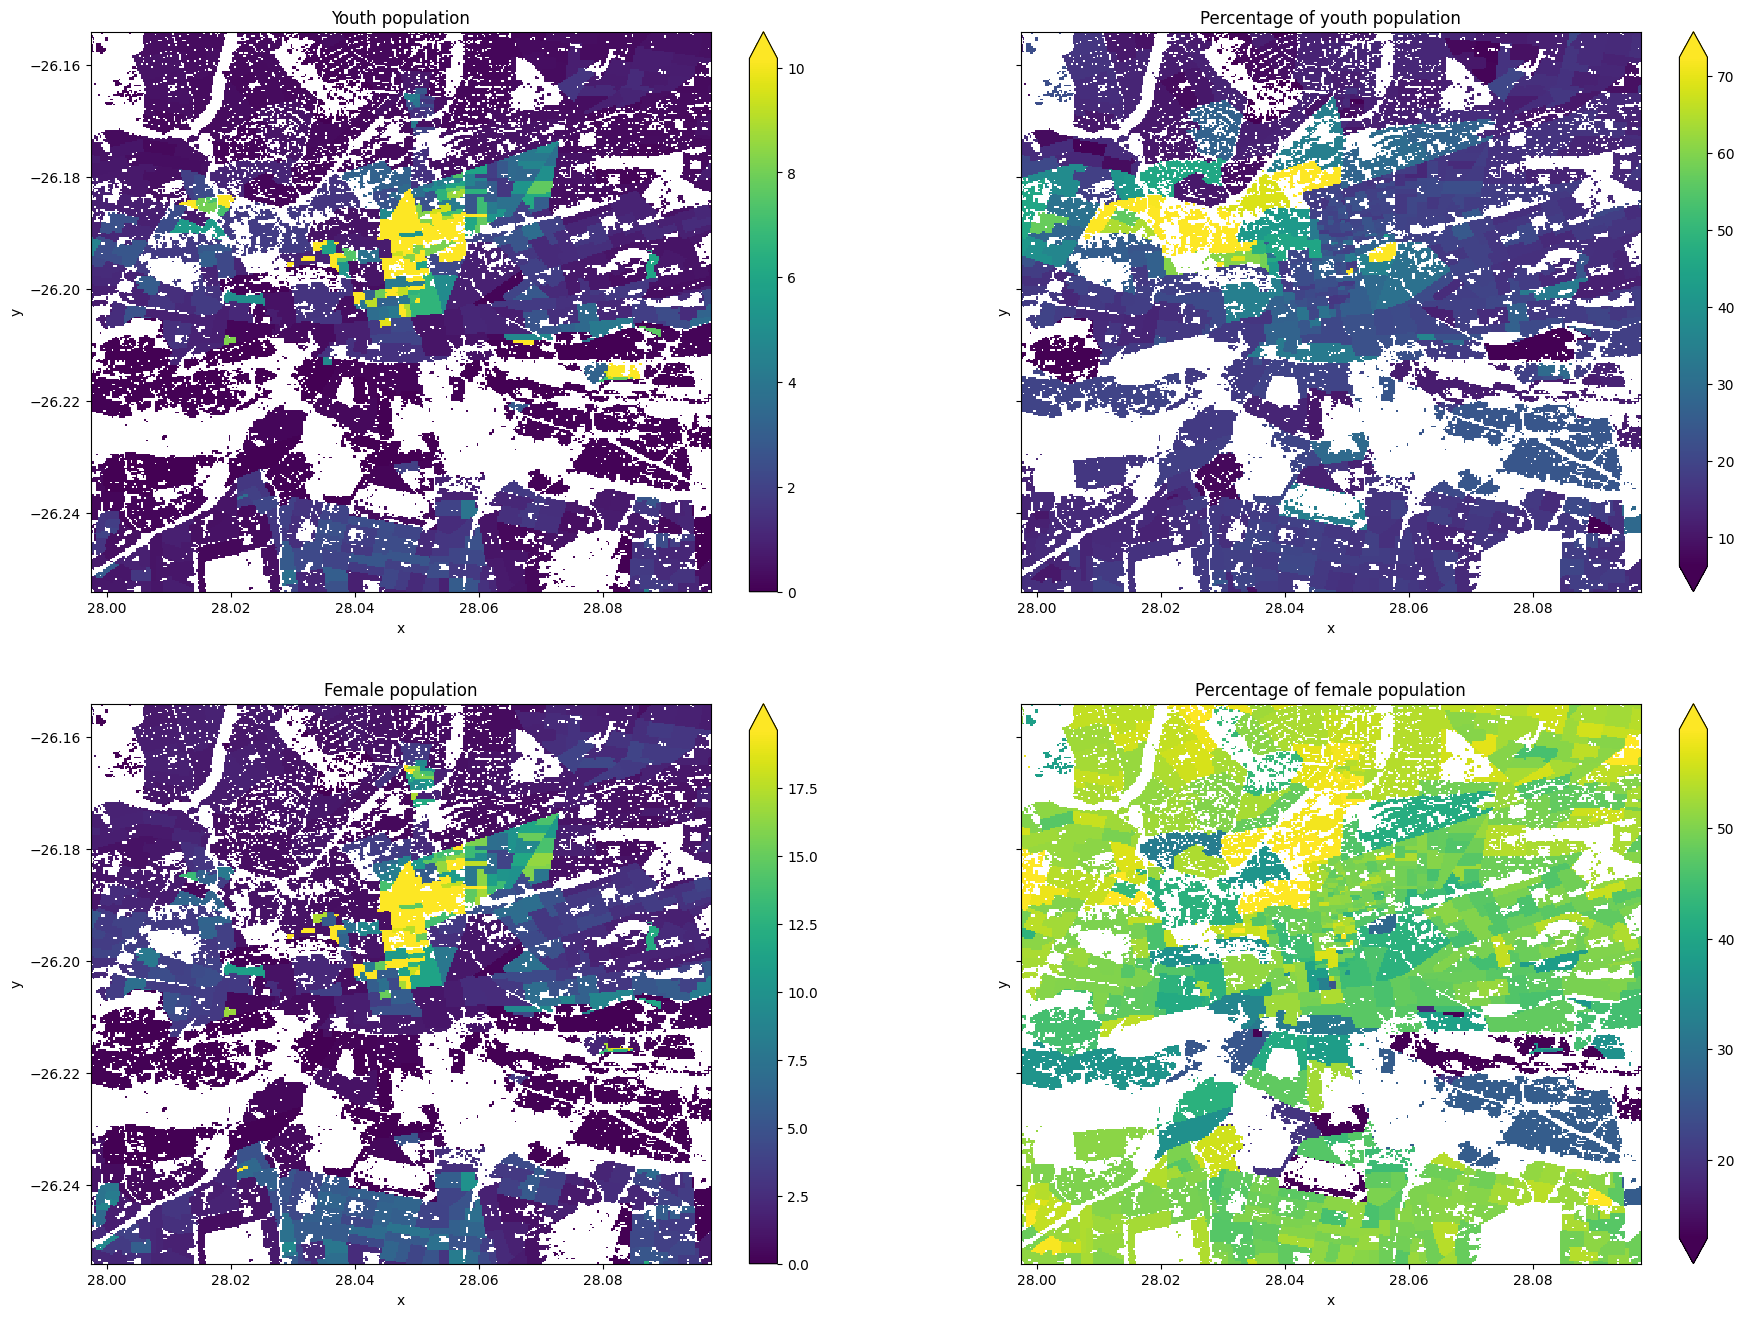

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(22, 16), sharey=True)

pop_youth.plot.imshow(ax=ax[0, 0], robust=True)
(pop_youth*100/pop_general).plot.imshow(ax=ax[0, 1], robust=True)

pop_women.plot.imshow(ax=ax[1, 0], robust=True)
(pop_women*100/pop_general).plot.imshow(ax=ax[1, 1], robust=True)

ax[0, 0].set_title("Youth population")
ax[0, 1].set_title("Percentage of youth population")

ax[1, 0].set_title("Female population")
ax[1, 1].set_title("Percentage of female population");

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:**

In [11]:
import datacube
print(datacube.__version__)

1.8.12


**Last Tested:**

In [12]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2023-03-30'